In [1]:
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
import os



2025-11-26 14:10:23.325065: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
# regression

test = np.load("../preprocessed_data_reg/test_data.npz")

X_test= test["X_test"]
y_test= test["y_test"]


print(y_test.shape)


model_path = "../src/best_model/best_cnn_model_reg.h5"
model = keras.models.load_model(model_path)

y_test_pred = model.predict(X_test, verbose=0) 

y_test_pred=np.squeeze(y_test_pred)

print(y_test_pred.shape)

'''
mae = mean_absolute_error(y_true, y_pred)
rmse = mean_squared_error(y_true, y_pred, squared=False)
r2  = r2_score(y_true, y_pred)
print("MAE:",mae,"RMSE:",rmse,"R2:",r2)'''

(165,)


2025-11-26 14:10:28.432180: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


(165,)


'\nmae = mean_absolute_error(y_true, y_pred)\nrmse = mean_squared_error(y_true, y_pred, squared=False)\nr2  = r2_score(y_true, y_pred)\nprint("MAE:",mae,"RMSE:",rmse,"R2:",r2)'

In [3]:

mae = mean_absolute_error(y_test, y_test_pred)
mse = mean_squared_error(y_test, y_test_pred)
rmse = mse ** 0.5
r2  = r2_score(y_test, y_test_pred)

print("MAE:", mae, "RMSE:", rmse, "R2:", r2)


MAE: 0.230094165802002 RMSE: 0.33422045411016654 R2: 0.9301854300339963


In [4]:
Ts= np.load("../preprocessed_data_reg/test_data.npz")["y_test"]

MAE=[]
Temp=[]
for T in np.unique(Ts):
    mask = (Ts == T)
    Temp.append(T)
    MAE.append(mean_absolute_error(y_test[mask], y_test_pred[mask]))
    print(T, "MAE:", mean_absolute_error(y_test[mask], y_test_pred[mask]))

1.0 MAE: 0.017246786753336588
1.4 MAE: 0.11174396673838306
1.8 MAE: 0.08991578896840416
2.2 MAE: 0.09394376754760743
2.6 MAE: 0.19350145339965819
3.0 MAE: 0.31871232986450193
3.4 MAE: 0.47169469197591146
3.8 MAE: 0.301850363413493
4.2 MAE: 0.2155306307474771
4.6 MAE: 0.20046964009602858
5.0 MAE: 0.5164264043172201


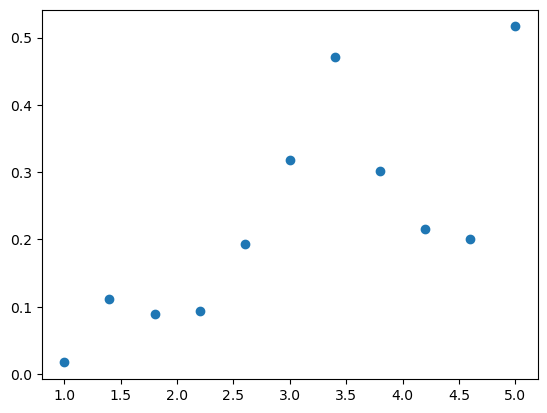

In [5]:
plt.scatter(Temp,MAE)

(165,)


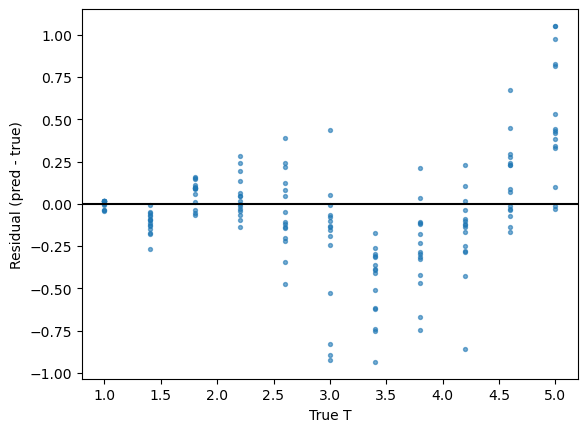

In [6]:
res = (y_test - y_test_pred)
print(res.shape)
plt.scatter(y_test, res, s=8, alpha=0.6)
plt.axhline(0, color='k')
plt.xlabel("True T"); plt.ylabel("Residual (pred - true)")
plt.show()